In [1]:
%load_ext autoreload
%autoreload 1
%autosave 60

Autosaving every 60 seconds


In [2]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt

In [3]:
sys.path.append("/u/davidm/Documents/Memoire/Scripts/RNA-seq/python/")

In [4]:
import RNAseq
importlib.reload(RNAseq)

<module 'RNAseq' from '/u/davidm/Documents/Memoire/Scripts/RNA-seq/python/RNAseq.py'>

In [6]:
cond = "er1"
project = "sc-MCF7-siRNA_DSP779"

### Plotting parameters

In [7]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.family'] = 'DeJavu Serif'

### Raw CB frequency

In [8]:
y = pd.read_table(f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/{project}/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh/raw/{cond}/alevin/raw_cb_frequency.txt", header=None)[1]

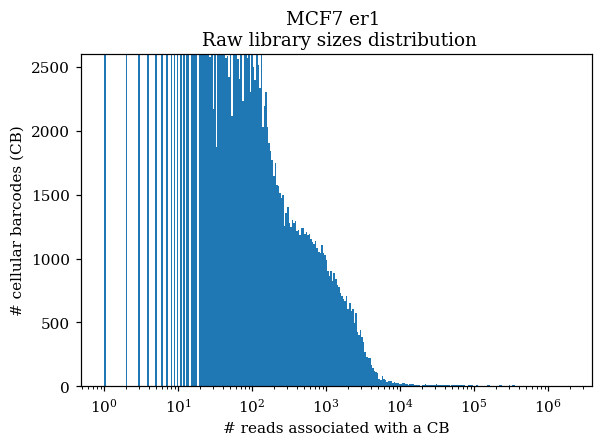

In [9]:
plt.title(f"MCF7 {cond} \n Raw library sizes distribution")
plt.ylim(0,2600);
plt.xlabel("# reads associated with a CB")
plt.ylabel("# cellular barcodes (CB)")
RNAseq.plot_loghist(y, bins=300)

In [10]:
x = pd.read_table(f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/{project}/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh/raw/{cond}/alevin/featureDump.txt")

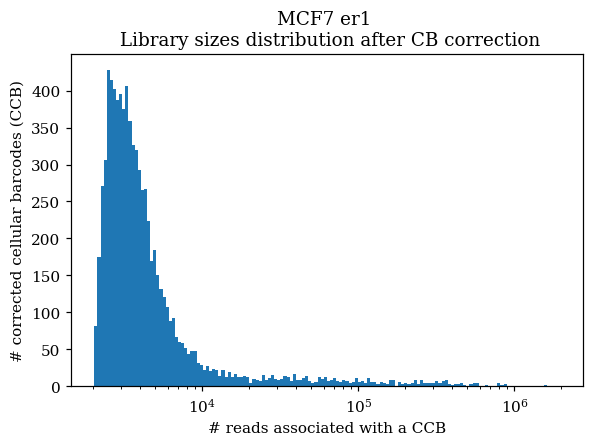

In [11]:
plt.title(f"MCF7 {cond} \n Library sizes distribution after CB correction")
plt.xlabel("# reads associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["CorrectedReads"], bins=150)

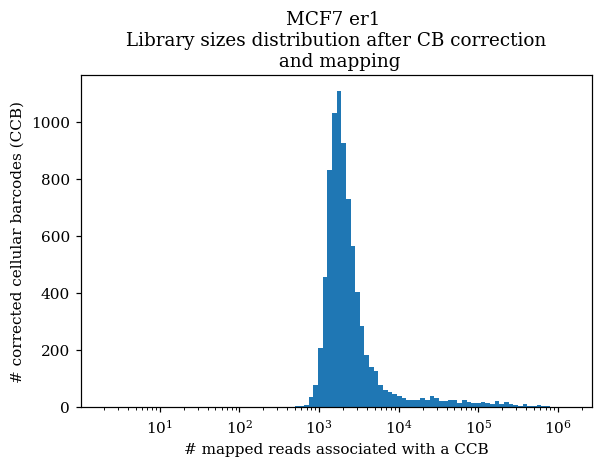

In [12]:
plt.title(f"MCF7 {cond} \n Library sizes distribution after CB correction \n and mapping")
plt.xlabel("# mapped reads associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["MappedReads"], bins=100)

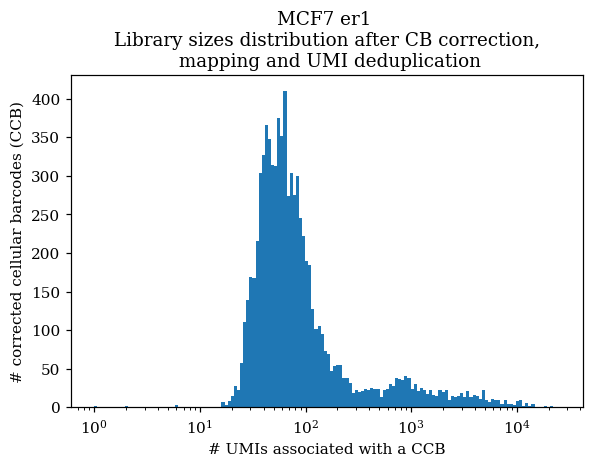

In [13]:
plt.title(f"MCF7 {cond} \n Library sizes distribution after CB correction, \n mapping and UMI deduplication")
plt.xlabel("# UMIs associated with a CCB")
plt.ylabel("# corrected cellular barcodes (CCB)")
RNAseq.plot_loghist(x["DeduplicatedReads"], bins=150)

### Loading raw count matrix

In [14]:
sc = RNAseq.sc_Dataset(project_path = f"/home/arion/davidm/Data/datasets/private/RNA-seq/sc/{project}", samples_id = "cell_lines", samples= cond, quant_tool="alevin", quant_params = 'trimmed-reads-cutadapt/pc-decoys-k17-1.4.0/forceCells-7000-noWh', pp = "raw")
sc.annotate_genes(annot_name = "external_gene_name")
sc.annotate_genes(annot_name = "chromosome_name")
sc.annotate_samples(annot_name = "mt_frac")
sc.annotate_samples(annot_name = "rp_frac")
sc.save()

In [15]:
sc.mtx.shape

(7992, 20305)

### Non stringent filtering

In [31]:
sc.reload()

__QC before filtering__

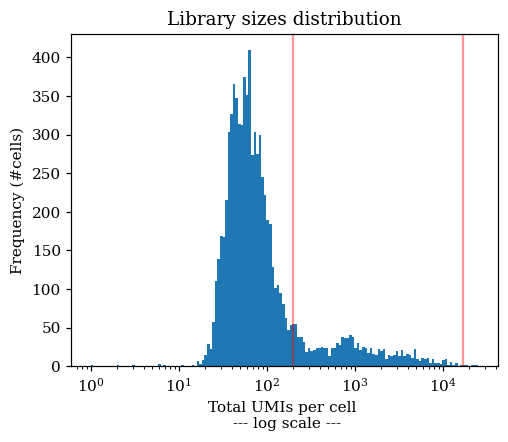

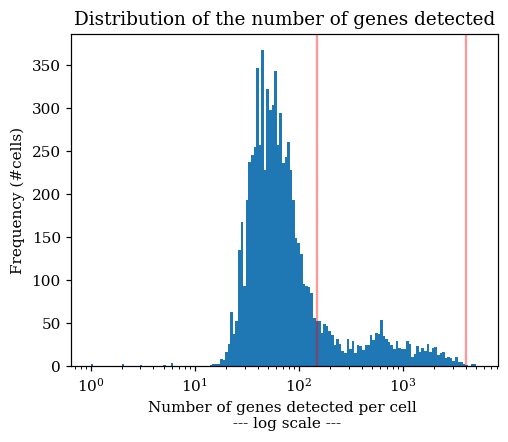

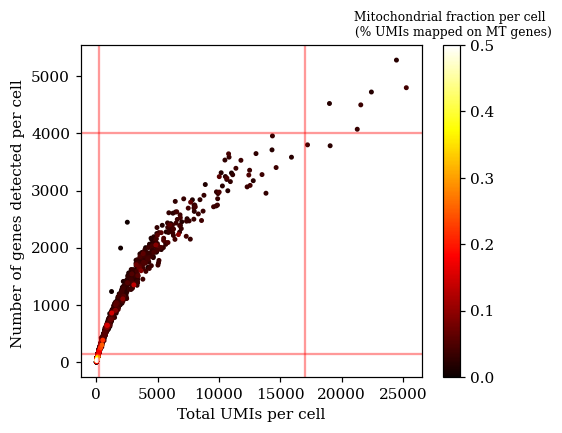

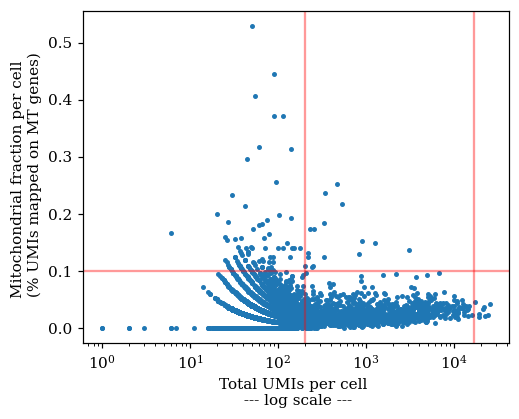

In [18]:
sc.plot_qc(n_counts_max=17000, n_counts_min = 200, n_genes_max=4000, n_genes_min = 150, mt_max = 0.1, n_bins=150)

__Filtering cells__

In [19]:
sc.filter_cells(n_counts_max=17000, n_counts_min = 200, n_genes_max=4000, n_genes_min = 150, mt_max = 0.1);

In [20]:
sc.mtx.shape

(1225, 20305)

__QC after filtering__

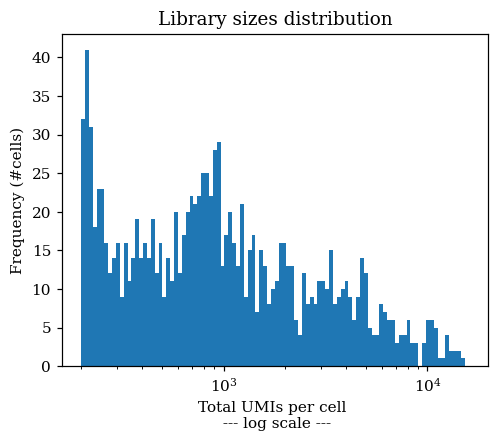

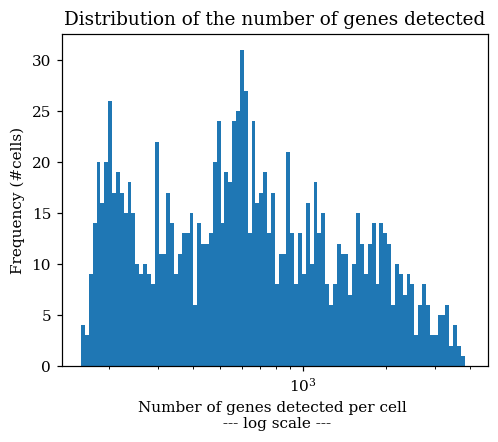

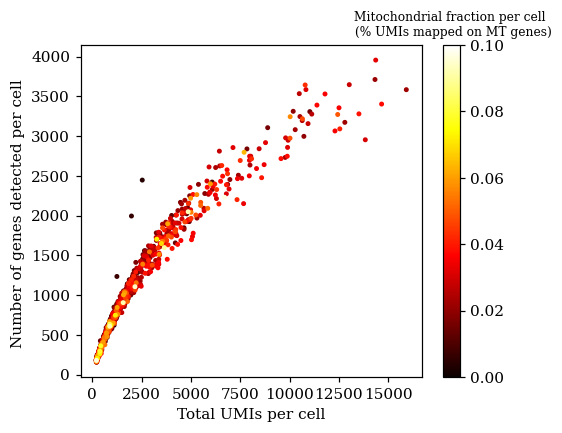

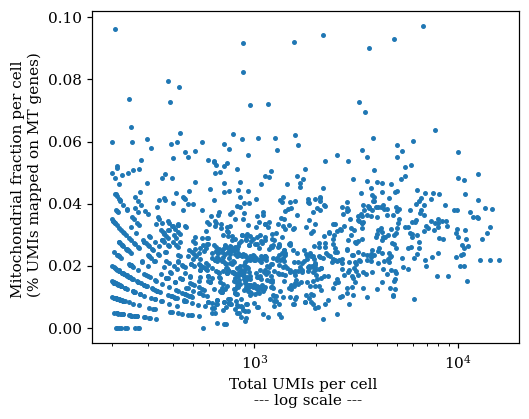

In [21]:
sc.plot_qc(show_cutoffs=False)

__Saving filtered count matrix__

In [22]:
sc.save_files(pp="filtered/non-stringent")

### Stringent filtering

In [36]:
sc.reload()

__QC__

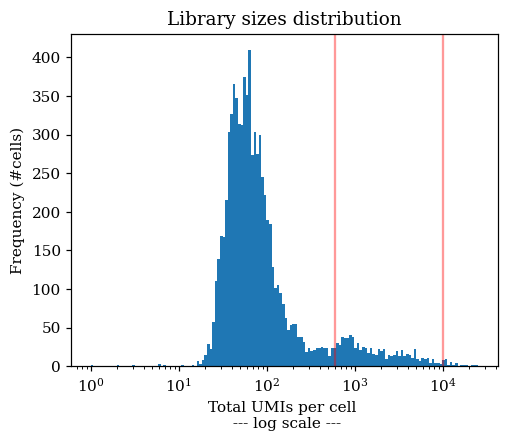

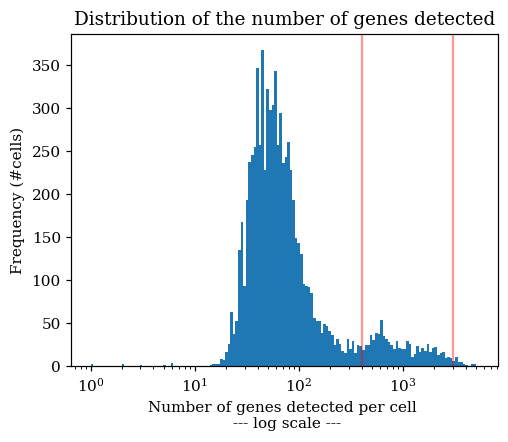

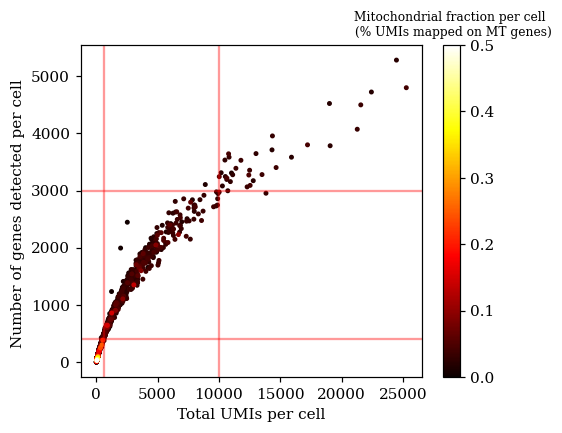

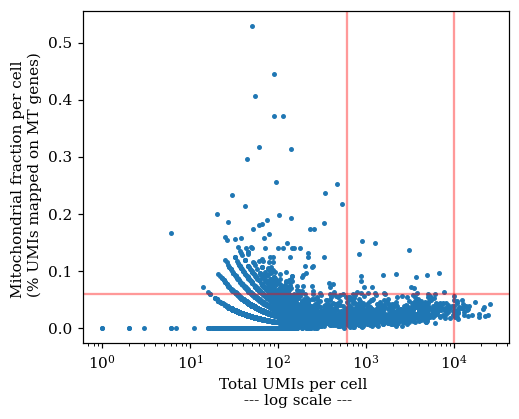

In [37]:
sc.plot_qc(n_counts_max=10000, n_counts_min = 600, n_genes_max=3000, n_genes_min = 400, mt_max = 0.06, n_bins=150)

__Filtering cells__

In [38]:
sc.filter_cells(n_counts_max=10000, n_counts_min = 600, n_genes_max=3000, n_genes_min = 400, mt_max = 0.06);

In [39]:
sc.mtx.shape

(735, 20305)

__QC after filtering__

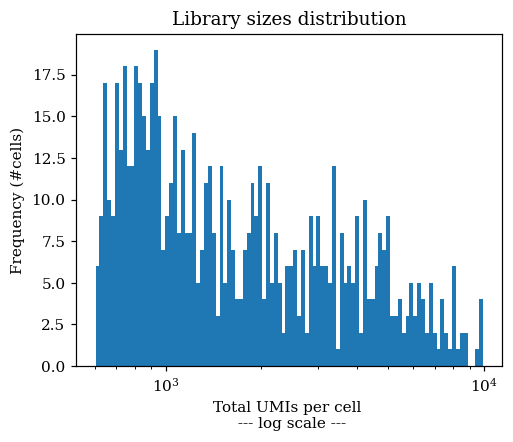

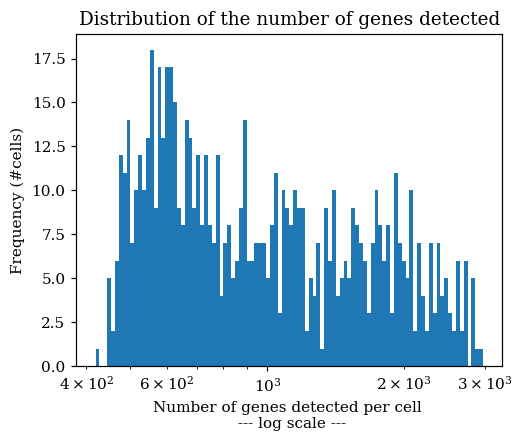

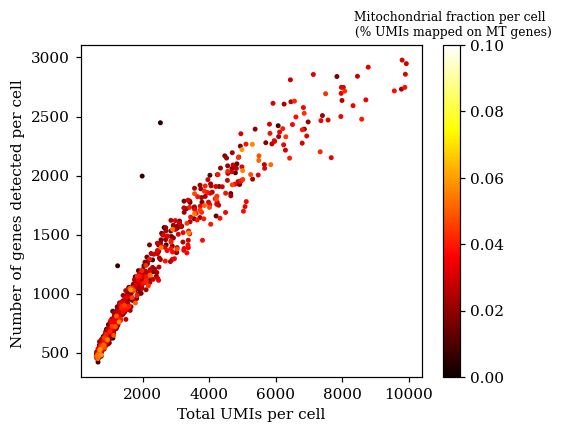

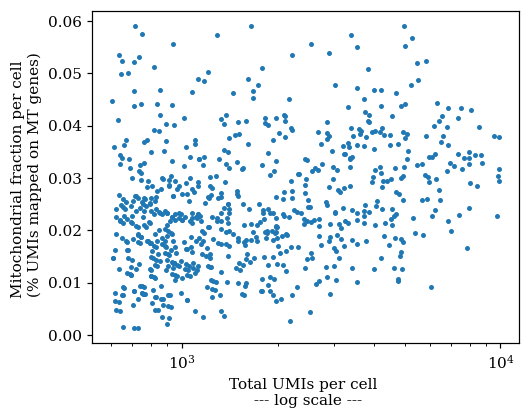

In [40]:
sc.plot_qc(show_cutoffs=False)

__Saving filtered count matrix__

In [41]:
sc.save_files(pp="filtered/stringent")